In [12]:
import keras
from keras import layers, models, optimizers
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
from keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Activation,regularizers
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
pd.options.display.float_format = '{:.4e}'.format

In [13]:
class MacOSFile(object):

    def __init__(self, f):
        self.f = f

    def __getattr__(self, item):
        return getattr(self.f, item)

    def read(self, n):
        # print("reading total_bytes=%s" % n, flush=True)
        if n >= (1 << 31):
            buffer = bytearray(n)
            idx = 0
            while idx < n:
                batch_size = min(n - idx, 1 << 31 - 1)
                # print("reading bytes [%s,%s)..." % (idx, idx + batch_size), end="", flush=True)
                buffer[idx:idx + batch_size] = self.f.read(batch_size)
                # print("done.", flush=True)
                idx += batch_size
            return buffer
        return self.f.read(n)

    def write(self, buffer):
        n = len(buffer)
        print("writing total_bytes=%s..." % n, flush=True)
        idx = 0
        while idx < n:
            batch_size = min(n - idx, 1 << 31 - 1)
            print("writing bytes [%s, %s)... " % (idx, idx + batch_size), end="", flush=True)
            self.f.write(buffer[idx:idx + batch_size])
            print("done.", flush=True)
            idx += batch_size


def pickle_dump(obj, file_path):
    with open(file_path, "wb") as f:
        return pickle.dump(obj, MacOSFile(f), protocol=pickle.HIGHEST_PROTOCOL)


def pickle_load(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(MacOSFile(f))

In [14]:

img_rows, img_cols = 32,32
img_channels = 3
X_train, X_test, y_train, y_test = pickle_load("/Users/tuhadaiki/Instable/colorful/sweets.sav")
#データの処理
#categories = ["building","food","pet","view"]
#categories = ["food_plate映えてる","food_plate映えてない"]
categories = ["sweets映えてる","sweets映えてない"]
nb_classes = len(categories)


In [18]:
from keras.models import model_from_json
from keras.models import load_model
import numpy as np
# 予測値

#保存した重みの読み込み
#model=load_model('/Users/tuhadaiki/Instable/colorful/cate2.h5')
model=load_model('/Users/tuhadaiki/Instable/colorful/sweets_test.h5')
model.summary()
New_test = []
cat=[]
for x in range(6):
    choice_idx = np.random.choice(np.where(y_test == 0)[0])
    New_test.append(X_test[choice_idx])
    cat.append(y_test[choice_idx])
for x in range(6):
    choice_idx = np.random.choice(np.where(y_test == 1)[0]) 
    New_test.append(X_test[choice_idx])
    cat.append(y_test[choice_idx])
New_test = np.array(New_test)

X_test  = X_test.astype("float32")  / 255
# 画像のラベルを推定する
Y_test_pred = model.predict(New_test)
print(Y_test_pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
__________

0
[1.        0.0035809]
_________
0
[0.9999999  0.00990435]
_________
0
[0.7674778 0.4983802]
_________
0
[0.9999999  0.00990435]
_________
0
[1.        0.0022417]
_________
0
[0.9999999  0.00990435]
_________
1
[0.0048024 0.9997459]
_________
1
[0.06275845 0.99966   ]
_________
1
[0.02617817 0.99575835]
_________
1
[0.39907354 0.9099481 ]
_________
1
[0.02617817 0.99575835]
_________
1
[0.02617817 0.99575835]
_________


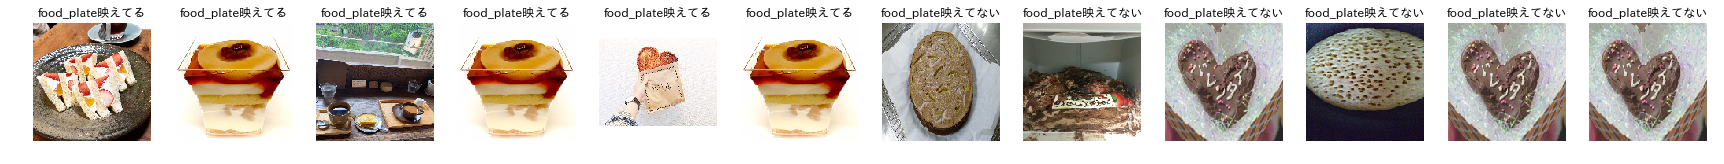

In [19]:
# データの可視化
# 上段は正しいラベル　下段は推測ラベル
fig, ax = plt.subplots(1, 12, figsize=(30, 16))
for for_1 in range(12):
    ax[for_1].imshow(New_test[for_1].reshape(150, 150, 3)) #for_2の値+nでn番目以降のテストデータを出力する．
    #print(np.argmax(Y_test_pred[for_1]))
    if Y_test_pred[for_1][0] > Y_test_pred[for_1][1]:
        title = "food_plate映えてる"
    else:
        title="food_plate映えてない"
        
    """
    if Y_test_pred[for_1][0] > Y_test_pred[for_1][1] and Y_test_pred[for_1][0] > Y_test_pred[for_1][2] and Y_test_pred[for_1][0] > Y_test_pred[for_1][3]:
        #title="drink映えてる"
        title = "building"
    elif Y_test_pred[for_1][1] > Y_test_pred[for_1][0] and Y_test_pred[for_1][1] > Y_test_pred[for_1][2] and Y_test_pred[for_1][1] > Y_test_pred[for_1][3]:
        title = "food"
    elif Y_test_pred[for_1][2] > Y_test_pred[for_1][0] and Y_test_pred[for_1][2] > Y_test_pred[for_1][1] and Y_test_pred[for_1][2] > Y_test_pred[for_1][3]:
        title = "pet"
    """
        #title = "view"
    ax[for_1].set_title(title)
    ax[for_1].axis('off')
    print(cat[for_1])
    print(Y_test_pred[for_1])
    print("_________")

#print(np.argmax([0.1,0.3]))
#print(y_test[0])


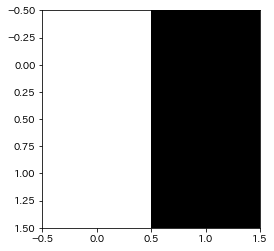

In [6]:
# 予測の可視化
# Y軸が渡した画像の数字　X軸がニューラルネットワークによる推定値
plt.imshow(Y_test_pred[:2], cmap='gray', interpolation='nearest', vmin=0, vmax=1) #Y_test_predの範囲を変えることで予測の場所を変更できる